In [58]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt

from pathlib import Path

In [64]:
# Convert the data to the Hueco V-scale
def convertGrade(font_grade):
    con_dict = {
        '6B+': 4,
        '6C': 5,
        '6C+': 5,
        '7A': 6,
        '7A+': 7,
        '7B': 8,
        '7B+': 8,
        '7C': 9,
        '7C+': 10,
        '8A': 11,
        '8A+': 12,
        '8B': 13,
        '8B+': 14
    }
    return con_dict[font_grade]

In [65]:
# Load data
cwd = Path.cwd()
moondf = pickle.load(open(cwd / '..' / 'raw_data' / 'moonGen_scrape_2016_final_df', 'rb'))
moondf = moondf[moondf['grade'] != '6B'] # drop the 9 6B's

In [66]:
# Convert all grades to V-scale
moondf['grade'] = moondf['grade'].apply(convertGrade)
unique_holds = [[0, 4], [0, 5], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 17],
                [1, 2], [1, 3], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 14], [1, 15], [1, 17],
                [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14], [2, 15], [2, 17],
                [3, 2], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14], [3, 15], [3, 16], [3, 17],
                [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14], [4, 15], [4, 17],
                [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [5, 14], [5, 15],
                [6, 1], [6, 3], [6, 5], [6, 6], [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [6, 13], [6, 14], [6, 15], [6, 16], [6, 17],
                [7, 4], [7, 6], [7, 7], [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [7, 13], [7, 14], [7, 15], [7, 17],
                [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8], [8, 9], [8, 10], [8, 11], [8, 12], [8, 13], [8, 14], [8, 15], [8, 17],
                [9, 1], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 9], [9, 10], [9, 11], [9, 12], [9, 13], [9, 15],
                [10, 4], [10, 5], [10, 6], [10, 7], [10, 8], [10, 9], [10, 10], [10, 11], [10, 12], [10, 13], [10, 15], [10, 17]]

In [67]:
def gradeHeatMap(df, grade):
    vmap = np.zeros((11, 18))
    gradedf = df[df['grade'] == grade]
    for hold in unique_holds:
        vmap[hold[0], hold[1]] = gradedf[f'{hold[0]}_{hold[1]}'].sum()
    plt.imshow(vmap.T[::-1], cmap='hot', interpolation='none')
    

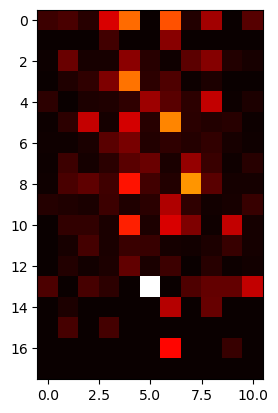

In [68]:
gradeHeatMap(moondf, 4)

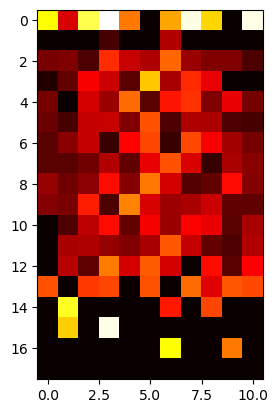

In [69]:
gradeHeatMap(moondf, 9)